In [1]:
# Dependencies
import os
import csv
import json
import time
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from pprint import pprint
from config import api_key
from citipy import citipy
import matplotlib.pyplot as plt

output_dir = os.path.join("Figures","")

In [2]:
## Create latitudes and cities lists variables and initialize them as empty lists
cities = []
# Generate a list of cities using a random function up to 1500 in size for scanning
# Note: larger number of cities can be obtained with larger size, however for this task only about 500 are required
latitude = np.random.uniform(low=-90.000, high=90.000, size=2000)
longitude = np.random.uniform(low=-180.000, high=180.000, size=2000)

latitudes_longitudes = zip(latitude, longitude)
count_cities_500 = 0
for latitude_longitude in latitudes_longitudes:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    # If city is not in cities, then append the city to the cities' list. Limit the city list to 500
    if city not in cities:
        if count_cities_500 < 500:
            cities.append(city)
            count_cities_500 += 1
        else:
            break
    else:
        continue
print(f"First five are listed here: {cities[:5]}...")
print(f"There are {len(cities)} cities in the list.")

First five are listed here: ['port alfred', 'okhotsk', 'ushuaia', 'rikitea', 'makakilo city']...
There are 500 cities in the list.


In [3]:
# url for weather api
units = 'english'
url   = "http://api.openweathermap.org/data/2.5/weather?q="
url2  = "http://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units=metric"
city_5_list    = cities[:5]
city_list      = []
temp_list      = []
lat_list       = []
long_list      = []
humid_list     = []
cloud_list     = []
wind_list      = []
city_id_list   = []
counter        = 0
city_id = 0

for city in cities:
    try:
        if counter < 49:
            query_test_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
            #print(query_test_url)
            response = requests.get(query_test_url).json()
            #print(response)
            city_list.append(response["name"])
            city_id = response["id"]
            city_id_list.append(response["id"])
            print(f"! City {city.capitalize()} with ID ({city_id}) is found.")
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            
            counter = counter + 1
        else:
            counter = 0
            print(f"!!! Reset counter")
            continue
#         if counter > 50:
#             counter = 1
#         else:
#             counter += 1
    except KeyError:
        print(f"City '{city.capitalize()}' was not found.")

! City Port alfred with ID (964432) is found.
! City Okhotsk with ID (2122605) is found.
! City Ushuaia with ID (3833367) is found.
! City Rikitea with ID (4030556) is found.
! City Makakilo city with ID (5850554) is found.
! City Bluff with ID (2206939) is found.
! City Bredasdorp with ID (1015776) is found.
! City Nizwa with ID (286987) is found.
! City Morehead with ID (4301317) is found.
! City Victoria with ID (1819729) is found.
! City Qaanaaq with ID (3831208) is found.
! City Atuona with ID (4020109) is found.
! City Virginia beach with ID (4791259) is found.
! City Hamilton with ID (4513583) is found.
City 'Tsihombe' was not found.
! City Faanui with ID (4034551) is found.
! City Murgab with ID (1218612) is found.
! City Vila with ID (7117100) is found.
! City Saint-augustin with ID (6137462) is found.
! City Hobart with ID (2163355) is found.
! City Albany with ID (5106841) is found.
City 'Ruatoria' was not found.
! City Cape town with ID (3369157) is found.
! City Teknaf wit

! City Petropavlovsk-kamchatskiy with ID (2122104) is found.
City 'Tabarqah' was not found.
! City Plettenberg bay with ID (964712) is found.
! City Lagoa with ID (3372964) is found.
! City Saint george with ID (5546220) is found.
! City Barrow with ID (5880054) is found.
! City Belmonte with ID (3470137) is found.
! City Freetown with ID (2409306) is found.
! City Aquiraz with ID (3407407) is found.
! City Taybad with ID (1159384) is found.
! City Isangel with ID (2136825) is found.
! City Koutsouras with ID (261814) is found.
! City Iracoubo with ID (3381428) is found.
! City Takhatpur with ID (1255212) is found.
City 'Sentyabrskiy' was not found.
! City Kaitangata with ID (2208248) is found.
! City Volksrust with ID (943032) is found.
! City Westport with ID (4845585) is found.
! City Dingle with ID (1714733) is found.
! City Brigantine with ID (4500920) is found.
! City Sao jose da coroa grande with ID (3388456) is found.
! City High rock with ID (3572189) is found.
! City Alugan w

! City Mokhsogollokh with ID (2019867) is found.
! City Nadym with ID (1498087) is found.
! City Tamworth with ID (2636276) is found.
! City Clyde river with ID (5924351) is found.
! City Gazanjyk with ID (161974) is found.
! City Dzerzhinsk with ID (563708) is found.
! City Zeya with ID (2012593) is found.
! City Porto torres with ID (3170069) is found.
! City Ekhabi with ID (2122614) is found.
! City Zhigansk with ID (2012530) is found.
! City Macomb with ID (4900817) is found.
! City Katobu with ID (1640972) is found.
! City Warri with ID (2319133) is found.
! City Mecca with ID (104515) is found.
! City Alma with ID (5884083) is found.
City 'Galgani' was not found.
! City Katsuura with ID (2112309) is found.
! City Pospelikha with ID (1494331) is found.
! City Derac with ID (3726728) is found.
! City Kuching with ID (1735634) is found.
! City Rusape with ID (882100) is found.
! City Oktyabrskiy with ID (515879) is found.
City 'Henzada' was not found.
! City Namatanai with ID (20900

NameError: name 'wnd_list' is not defined

In [4]:
print(len(cities))

500


In [5]:
# Create a dataframe from the collected data
weather_df = pd.DataFrame({'City': city_list,
                           'Temperature (DegF)': temp_list,
                           'Cloudiness (%)': cloud_list,
                           'Latitude': lat_list,
                           'Longitude': long_list,
                           'Humidity (%)': humid_list,
                           'Wind Speed (mps)': wind_list})
weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Port Alfred,287.59,0,-33.59,26.89,60,2.68
1,Okhotsk,284.08,65,59.38,143.30,74,3.66
2,Ushuaia,274.15,75,-54.80,-68.30,80,8.20
3,Rikitea,297.61,72,-23.12,-134.97,82,8.03
4,Makakilo City,298.34,40,21.35,-158.09,64,2.60


In [6]:
# Extract data for the northern hemisphere
northern_weather_df = weather_df.loc[weather_df['Latitude'] >= 0]
northern_weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
1,Okhotsk,284.08,65,59.38,143.30,74,3.66
4,Makakilo City,298.34,40,21.35,-158.09,64,2.60
7,Nizwá,314.74,1,22.93,57.53,11,2.98
8,Morehead,289.91,40,37.27,-87.18,100,0.14
9,Hong Kong,303.70,100,22.29,114.16,74,3.58


In [7]:
# Extract data for the southern hemisphere
southern_weather_df = weather_df.loc[weather_df['Longitude'] < 0]
southern_weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
2,Ushuaia,274.15,75,-54.80,-68.30,80,8.20
3,Rikitea,297.61,72,-23.12,-134.97,82,8.03
4,Makakilo City,298.34,40,21.35,-158.09,64,2.60
8,Morehead,289.91,40,37.27,-87.18,100,0.14
10,Qaanaaq,271.33,0,77.48,-69.36,91,1.12


In [8]:
# Extract column data to use for a scatter plot
temp_north  = northern_weather_df['Temperature (DegF)']
humid_north = northern_weather_df['Humidity (%)']
cloud_north = northern_weather_df['Cloudiness (%)']
wind_north  = northern_weather_df['Wind Speed (mps)']
lat_north   = northern_weather_df['Latitude']

print(cloud_north[:5])

1     65
4     40
7      1
8     40
9    100
Name: Cloudiness (%), dtype: int64


In [9]:
# Extract data for the Southern hemisphere
temp_south  = southern_weather_df['Temperature (DegF)']
humid_south = southern_weather_df['Humidity (%)']
cloud_south = southern_weather_df['Cloudiness (%)']
wind_south  = southern_weather_df['Wind Speed (mps)']
lat_south   = southern_weather_df['Latitude']

print(cloud_south[:5])

2     75
3     72
4     40
8     40
10     0
Name: Cloudiness (%), dtype: int64


In [10]:
def plot_linear_regression(x_axis, y_axis, title, ylabel, xlabel):
    # Plot temperature vs. latitude for the Northern hemisphere
    plt.scatter(x_axis, y_axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    m, b = np.polyfit(x_axis, y_axis, 1)
    plt.plot(x_axis, m*x_axis + b)
    plt.savefig(f"Figures/{title}.png")
    plt.show()
    # Identify Pearson value
    print(f"Pearson's correlation{round(sts.pearsonr(x_axis, y_axis)[0],2)}")
#plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")

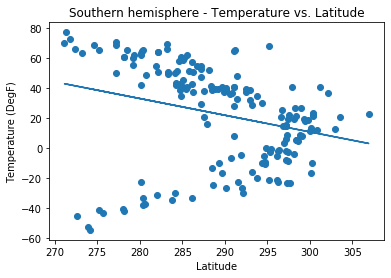

Pearson's correlation-0.28


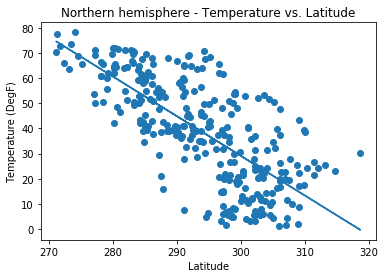

Pearson's correlation-0.72


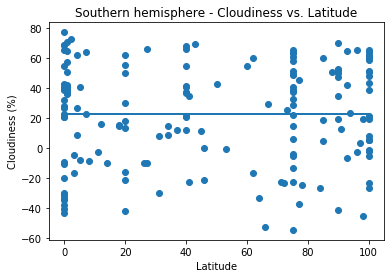

Pearson's correlation-0.0


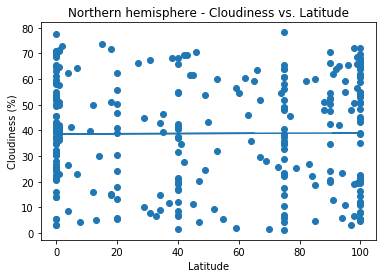

Pearson's correlation0.01


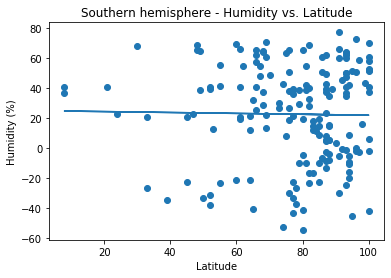

Pearson's correlation-0.02


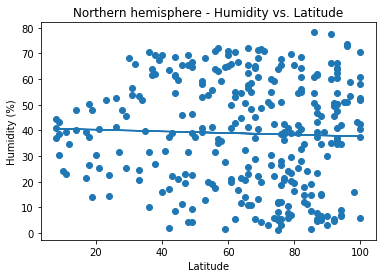

Pearson's correlation-0.04


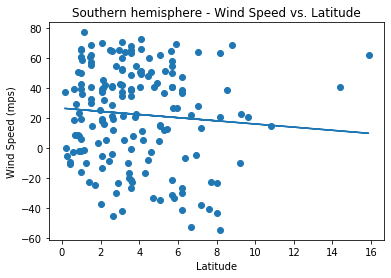

Pearson's correlation-0.08


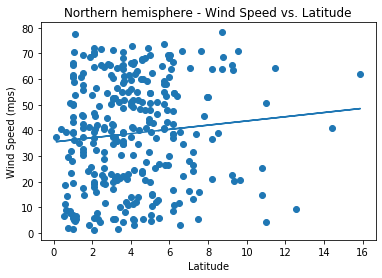

Pearson's correlation0.1


In [11]:
plot_linear_regression(temp_south, lat_south, "Southern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")
plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")
plot_linear_regression(cloud_south, lat_south, "Southern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")
plot_linear_regression(cloud_north, lat_north, "Northern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")
plot_linear_regression(humid_south, lat_south, "Southern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")
plot_linear_regression(humid_north, lat_north, "Northern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")
plot_linear_regression(wind_south, lat_south, "Southern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")
plot_linear_regression(wind_north, lat_north, "Northern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")